In [221]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('titanic_data/train.csv')

In [222]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
newdata = [data]

for dataset in newdata:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [224]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Lady          1
Don           1
Sir           1
Jonkheer      1
Capt          1
Ms            1
Mme           1
Name: Title, dtype: int64

In [225]:
title_mapping = {
    "Mr": 0,
    "Miss": 1,
    "Mrs": 2,
    "Master": 3,
    "Dr": 3,
    "Rev": 3,
    "Col": 3,
    "Mille": 3,
    "Major": 3,
    "Major": 3,
    "Ms": 3,
    "Countess": 3,
    "Don": 3,
    "Jonkheer": 3,
    "Lady": 3,
    "Mme": 3,
    "Capt": 3,
    "Sir": 3
}
for dataset in newdata:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [226]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


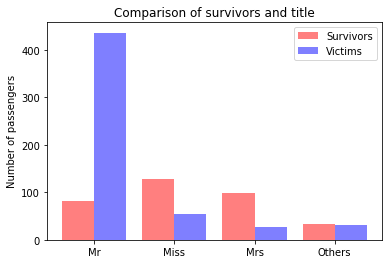

In [227]:
survived = data[data['Survived']==1]['Title'].value_counts()
dead = data[data['Survived']==0]['Title'].value_counts()

plt.bar(survived.index, survived, align='edge', width=-0.4, label='Survivors', color='red', alpha=0.5)
plt.bar(dead.index, dead, align='edge', width=0.4, label='Victims', color='blue', alpha=0.5)


plt.legend()
plt.xticks(np.arange(4), ('Mr', 'Miss', 'Mrs', 'Others'), rotation=0)
plt.ylabel("Number of passengers")
plt.title("Comparison of survivors and title")

plt.show()

In [228]:
data.drop('Name', axis=1, inplace=True)

In [229]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [230]:
gender_mapping = {
    "male": 0,
    "female": 1
}
for dataset in newdata:
    dataset['Sex'] = dataset['Sex'].map(gender_mapping)

In [231]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


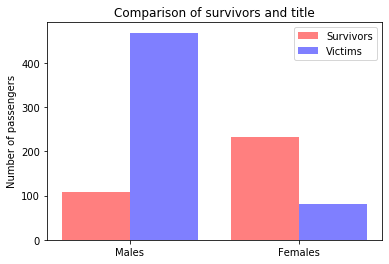

In [232]:
survived = data[data['Survived']==1]['Sex'].value_counts()
dead = data[data['Survived']==0]['Sex'].value_counts()

plt.bar(survived.index, survived, align='edge', width=-0.4, label='Survivors', color='red', alpha=0.5)
plt.bar(dead.index, dead, align='edge', width=0.4, label='Victims', color='blue', alpha=0.5)


plt.legend()
plt.xticks(np.arange(2), ('Males', 'Females'), rotation=0)
plt.ylabel("Number of passengers")
plt.title("Comparison of survivors and title")

plt.show()

In [233]:
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'), inplace=True)

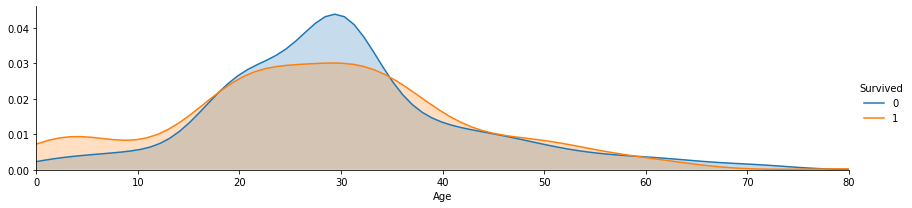

In [234]:
import seaborn as sns
facet = sns.FacetGrid(data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()

plt.show()

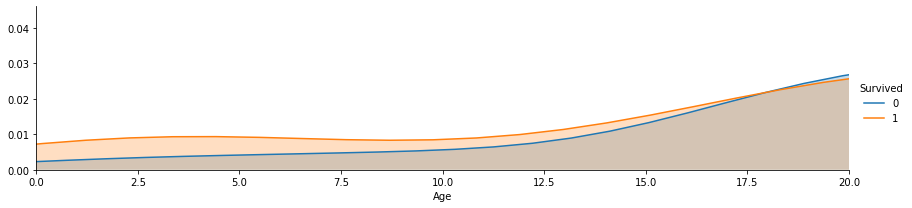

In [235]:
import seaborn as sns
facet = sns.FacetGrid(data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

plt.show()

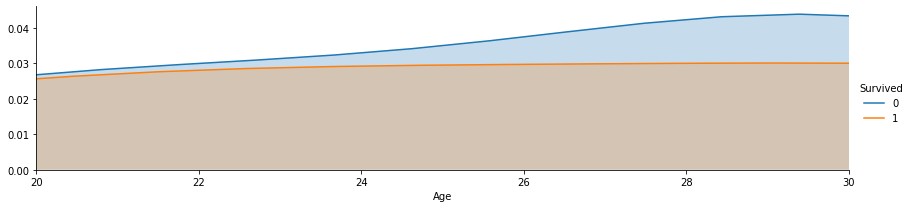

In [236]:
import seaborn as sns
facet = sns.FacetGrid(data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

plt.show()

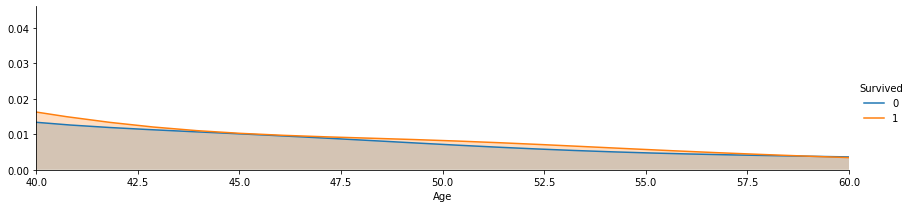

In [237]:
import seaborn as sns
facet = sns.FacetGrid(data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

plt.show()

In [238]:
for dataset in newdata:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4

In [239]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


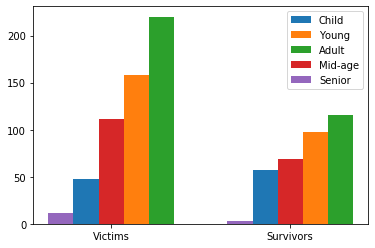

In [240]:
child = data[data['Age']==0]['Survived'].value_counts()
young = data[data['Age']==1]['Survived'].value_counts()
adult = data[data['Age']==2]['Survived'].value_counts()
mid_age = data[data['Age']==3]['Survived'].value_counts()
senior = data[data['Age']==4]['Survived'].value_counts()


plt.bar(child.index-0.14, child, width=0.14, label='Child')
plt.bar(young.index+0.14, young, width=0.14, label='Young')
plt.bar(adult.index+0.28, adult, width=-0.14, label='Adult')
plt.bar(mid_age.index, mid_age, width=0.14, label='Mid-age')
plt.bar(senior.index-0.28, senior, width=0.14, label='Senior')

plt.xticks(np.arange(2), ('Victims', 'Survivors'), rotation=0)
plt.legend()


In [241]:
data[data['Age']==0]['Survived'].value_counts()

1    57
0    48
Name: Survived, dtype: int64

In [242]:
data[data['Age']==1]['Survived'].value_counts()

0    158
1     97
Name: Survived, dtype: int64

In [243]:
data[data['Age']==2]['Survived'].value_counts()

0    220
1    116
Name: Survived, dtype: int64

In [244]:
data[data['Age']==3]['Survived'].value_counts()

0    111
1     69
Name: Survived, dtype: int64

In [245]:
data[data['Age']==4]['Survived'].value_counts()

0    12
1     3
Name: Survived, dtype: int64

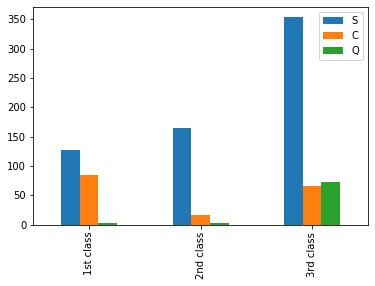

In [246]:
Pclass1 = data[data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = data[data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = data[data['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar')


plt.legend()


In [247]:
data[data['Pclass']==1]['Embarked'].value_counts()


S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [248]:
data[data['Pclass']==2]['Embarked'].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [249]:
data[data['Pclass']==3]['Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [250]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Title          889
dtype: int64

In [251]:
for dataset in newdata:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [252]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       891
Title          889
dtype: int64

In [253]:
for dataset in newdata:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

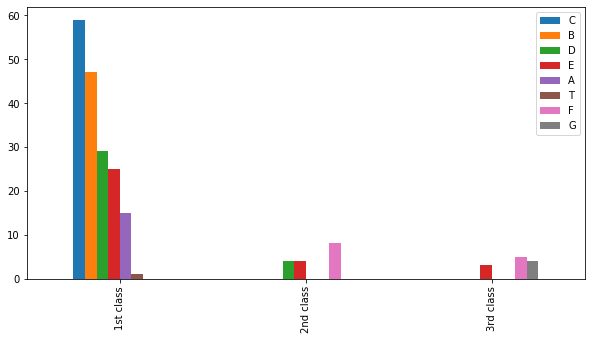

In [254]:
Pclass1 = data[data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = data[data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = data[data['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', figsize=(10,5))


plt.legend()

In [255]:
cabin_mapping = {
    "A": 0,
    "B": 0.25,
    "C": 0.5,
    "D": 0.75,
    "E": 1,
    "F": 1.25,
    "G": 1.5,
    "T": 1.75
}
for dataset in newdata:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [256]:
data['Cabin'].fillna(data.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [257]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,1.25,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,0.50,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,1.25,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,0.50,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,1.25,S,0.0


In [258]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
Title          889
dtype: int64

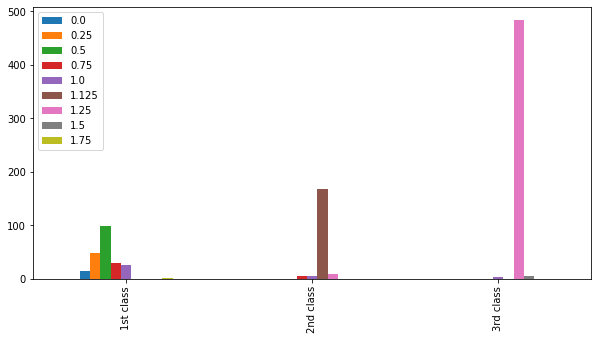

In [259]:
Pclass1 = data[data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = data[data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = data[data['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', figsize=(10,5))


plt.legend()

In [260]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [261]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,1.25,S,0.0,2
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,0.50,C,2.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,1.25,S,1.0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,0.50,S,2.0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,1.25,S,0.0,1


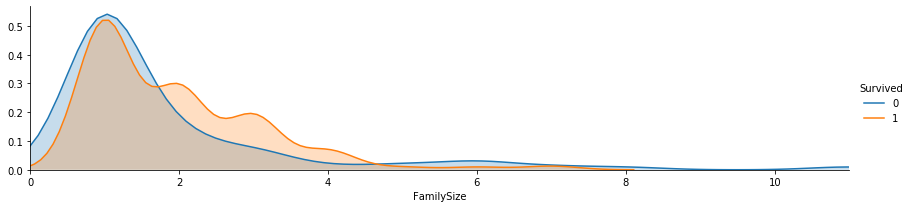

In [262]:
facet = sns.FacetGrid(data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, data['FamilySize'].max()))
facet.add_legend()

plt.show()

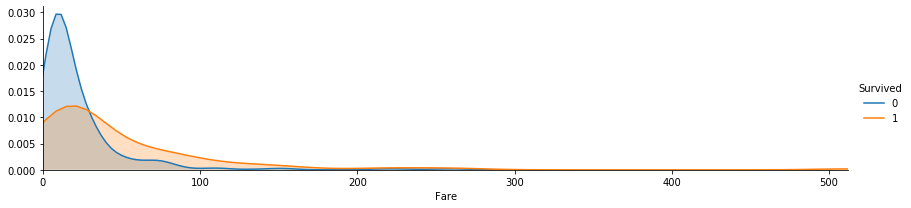

In [263]:
facet = sns.FacetGrid(data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, data['Fare'].max()))
facet.add_legend()

plt.show()

In [264]:
for dataset in newdata:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[(dataset['Fare'] > 100), 'Fare'] = 3

In [265]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,1.25,S,0.0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.50,C,2.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,1.25,S,1.0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.50,S,2.0,2
4,5,0,3,0,2.0,0,0,373450,0.0,1.25,S,0.0,1


In [266]:
data = data.drop(['Parch'], axis=1)
data = data.drop(['Ticket'], axis=1)
data = data.drop(['SibSp'], axis=1)
data = data.drop(['PassengerId'], axis=1)

In [267]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,1.25,S,0.0,2
1,1,1,1,3.0,2.0,0.50,C,2.0,2
2,1,3,1,1.0,0.0,1.25,S,1.0,1
3,1,1,1,2.0,2.0,0.50,S,2.0,2
4,0,3,0,2.0,0.0,1.25,S,0.0,1
